In [1]:
from helpers import *
from implementations import *
from preprocessing import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#data_folder = './data/'
data_folder = 'C:/Users/ACER/OneDrive - epfl.ch/Desktop/ML/dataset/'
#data_folder = "C:/Users/plane/OneDrive/Bureau/MilaLyon/data/dataset/"
#data_folder = "C:/Users/ACER/OneDrive - epfl.ch/Desktop/ML/MilaLyon/data/"


# Loading data from CSV files

The file `data/default_values.csv` contains information about each feature

* **feature**: name of the feature

* **Value for zero**: value to replace missing values if the feature is numerical and the missing values are to be replaced by zero (ex: for `CHILDREN` 88 means 0 children)

* **Combination of other indicators**: 1 if the feature is just a combination of other features (ex: `_RFHLTH` is 1 if `GENHLTH` = 1, 2 or 3 and 2 if `GENHLTH` = 4 or 5)

* **Health related**: 1 if the feature is health related

* **Bad format, better format elsewhere**: 1 if the feature is in a bad format but parsed in another feature

* **Bad format, no better**: 1 if the feature is in a bad format and not parsed in another feature

* **Values for no response**: values that indicate no response

In [3]:
_data = load_csv_data(data_folder, max_rows=1000)
x_train, x_test, y_train, train_ids, test_ids, feature_names, zero_values, default_values, useless, health_related, better_elsewhere, bad_format_no_better = _data

print("Number of training samples: ", x_train.shape[0]
      , "\nNumber of test samples: ", x_test.shape[0]
      , "\nNumber of features: ", x_train.shape[1])

Number of training samples:  1000 
Number of test samples:  1000 
Number of features:  321


In [4]:
# Pandas version
# drop first column (ids)
df_x_train = pd.read_csv(data_folder + 'x_train.csv').drop(columns=['Id'])
df_y_train = pd.read_csv(data_folder + 'y_train.csv').drop(columns=['Id'])
df_x_test = pd.read_csv(data_folder + 'x_test.csv').drop(columns=['Id'])

# Pandas version
print(df_x_train.info())
print(df_x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328135 entries, 0 to 328134
Columns: 321 entries, _STATE to _AIDTST3
dtypes: float64(244), int64(77)
memory usage: 803.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109379 entries, 0 to 109378
Columns: 321 entries, _STATE to _AIDTST3
dtypes: float64(237), int64(84)
memory usage: 267.9 MB
None


# Preprocessing

## Replace default values in dataset by NaN

Custom implementation

In [5]:
print("Default values for _PRACE1:", default_values['_PRACE1'])

print()
print("Row index | Value of _PRACE1 before replacing defaults with NaN")
print("9         |", x_train[9,feature_names == '_PRACE1'])
print("101       |", x_train[101,feature_names == '_PRACE1'])
print("202       |", x_train[202,feature_names == '_PRACE1'])

replace_default_with_nan(x_train, x_test, feature_names, default_values)

print()
print("Row index | Value of _PRACE1 after replacing defaults with NaN")
print("9         |", x_train[9,feature_names == '_PRACE1'])
print("101       |", x_train[101,feature_names == '_PRACE1'])
print("202       |", x_train[202,feature_names == '_PRACE1'])

Default values for _PRACE1: [77.0, 99.0]

Row index | Value of _PRACE1 before replacing defaults with NaN
9         | [77.]
101       | [6.]
202       | [99.]

Row index | Value of _PRACE1 after replacing defaults with NaN
9         | [nan]
101       | [6.]
202       | [nan]


Pandas implementation

In [6]:
# With Pandas
print()
print("Row index | Value of _PRACE1 before replacing defaults with NaN")
print("9         |", df_x_train.loc[9,'_PRACE1'])
print("101       |", df_x_train.loc[101,'_PRACE1'])
print("202       |", df_x_train.loc[202,'_PRACE1'])

for i, feature in enumerate(feature_names):
    # Replace default values with NaN
    for default_value in default_values[feature]:
        df_x_train.loc[df_x_train[feature] == default_value, feature] = np.nan
        df_x_test.loc[df_x_test[feature] == default_value, feature] = np.nan
        
print()
print("Row index | Value of _PRACE1 after replacing defaults with NaN")
print("9         |", df_x_train.loc[9,'_PRACE1'])
print("101       |", df_x_train.loc[101,'_PRACE1'])
print("202       |", df_x_train.loc[202,'_PRACE1'])


Row index | Value of _PRACE1 before replacing defaults with NaN
9         | 77
101       | 6
202       | 99

Row index | Value of _PRACE1 after replacing defaults with NaN
9         | nan
101       | 6.0
202       | nan


## Drop features with too many NaN

In [7]:
x_train_drop_nan, x_test_drop_nan, feature_names_drop_nan = drop_too_many_missing(x_train, x_test, feature_names, threshold=0.2)

Dropped 183 features (57.0%)
Dropped feature names: ['CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE', 'HHADULT', 'POORHLTH', 'BPMEDS', 'ASTHNOW', 'DIABAGE2', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'PREGNANT', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FVBEANS', 'FVORANG', 'EXRACT11', 'EXEROFT1', 'EXERHMM1', 'EXRACT21', 'EXEROFT2', 'EXERHMM2', 'LMTJOIN3', 'ARTHDIS2', 'ARTHSOCL', 'JOINPAIN', 'FLSHTMY2', 'IMFVPLAC', 'PNEUVAC3', 'HIVTSTD3', 'WHRTST10', 'PDIABTST', 'PREDIAB1', 'INSULIN', 'BLDSUGAR', 'FEETCHK2', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 'EYEEXAM', 'DIABEYE', 'DIABEDU', 'CAREGIV1', 'CRGVREL1', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB1', 'CRGVPERS', 'CRGVHOUS', 'CRGVMST2', 'CRGVEXPT', 'VIDFCLT2', 'VIREDIF3', 'VIPRFVS2', 'VINOCRE2', 'VIEYEXM2', 'VIINSUR2', 'VICTRCT4', 'VIGLUMA2', 'VIMACDG2', 'CIMEMLOS', 'CDHOUSE', 'CDASSIS

In [8]:
print( "\nNumber of features: ", x_train_drop_nan.shape[1])


Number of features:  138


In [22]:
# Get names of kept features
kept_feature_names = np.array(feature_names)[feature_names_drop_nan]

print(f"Kept {len(kept_feature_names)} features out of {len(feature_names)}")
print(kept_feature_names)


Kept 138 features out of 321
['_STATE' 'FMONTH' 'IDATE' 'IMONTH' 'IDAY' 'IYEAR' 'DISPCODE' 'SEQNO'
 '_PSU' 'GENHLTH' 'PHYSHLTH' 'MENTHLTH' 'HLTHPLN1' 'PERSDOC2' 'MEDCOST'
 'CHECKUP1' 'BPHIGH4' 'BLOODCHO' 'CHOLCHK' 'TOLDHI2' 'CVDSTRK3' 'ASTHMA3'
 'CHCSCNCR' 'CHCOCNCR' 'CHCCOPD1' 'HAVARTH3' 'ADDEPEV2' 'CHCKIDNY'
 'DIABETE3' 'SEX' 'MARITAL' 'EDUCA' 'RENTHOM1' 'VETERAN3' 'EMPLOY1'
 'CHILDREN' 'INCOME2' 'INTERNET' 'WEIGHT2' 'HEIGHT3' 'QLACTLM2' 'USEEQUIP'
 'BLIND' 'DECIDE' 'DIFFWALK' 'DIFFDRES' 'DIFFALON' 'SMOKE100' 'USENOW3'
 'ALCDAY5' 'FRUIT1' 'FVGREEN' 'VEGETAB1' 'EXERANY2' 'STRENGTH' 'SEATBELT'
 'FLUSHOT6' 'HIVTST6' 'QSTVER' 'QSTLANG' '_STSTR' '_STRWT' '_RAWRAKE'
 '_WT2RAKE' '_DUALUSE' '_LLCPWT' '_RFHLTH' '_RFHYPE5' '_CHOLCHK' '_RFCHOL'
 '_LTASTH1' '_CASTHM1' '_ASTHMS1' '_DRDXAR1' '_PRACE1' '_MRACE1'
 '_HISPANC' '_RACE' '_RACEG21' '_RACEGR3' '_RACE_G1' '_AGEG5YR' '_AGE65YR'
 '_AGE80' '_AGE_G' 'HTIN4' 'HTM4' 'WTKG3' '_BMI5' '_BMI5CAT' '_RFBMI5'
 '_CHLDCNT' '_EDUCAG' '_INCOMG' '_SMOKER3' 

In [9]:

df = pd.read_csv(r"C:\\Users\\ACER\\OneDrive - epfl.ch\\Desktop\\ML\\MilaLyon\\data\\default_values.csv")

# Make sure cols_to_keep is a numpy array of booleans
cols_to_keep = np.array(feature_names_drop_nan)

# Keep only rows where cols_to_keep is True
df_kept = df[cols_to_keep]

# Optionally, reset the index
df_kept = df_kept.reset_index(drop=True)

# Save to a new CSV
df_kept.to_csv("features_kept.csv", index=False)

print(f"Kept {df_kept.shape[0]} rows out of {df.shape[0]}")


Kept 138 rows out of 321


Now let's only consider health related features

In [23]:
df_health = df_kept[df_kept['Health related'] == 1]

df_health.to_csv("health_related_features.csv", index=False)

print(f"Kept {df_health.shape[0]} rows out of {df_kept.shape[0]}")


Kept 92 rows out of 138


In [18]:
with open(r"C:\Users\ACER\OneDrive - epfl.ch\Desktop\ML\MilaLyon\features_kept.csv", "r", encoding="utf-8") as f:
    header = f.readline().strip().split(",")
print(header)

['Feature', 'Value for zero', 'Combination of other indicators', 'Health related', '"Bad format', ' better format elsewhere"', '"Bad format', ' no better"', 'Values for no response', 'Unnamed: 7', 'Unnamed: 8', 'Binary', 'One-hot', 'Reverse Binary', 'Remapping needed', 'Unnamed: 13']


In [25]:
health_flags = np.genfromtxt(
    r"C:\Users\ACER\OneDrive - epfl.ch\Desktop\ML\MilaLyon\features_kept.csv",
    delimiter=",",
    skip_header=1,
    usecols=3,
    filling_values=0
)

# Keep only features where Health related == 1
mask_health = (health_flags == 1)
x_train_health = x_train_drop_nan[:, mask_health]
x_test_health = x_test_drop_nan[:, mask_health]

# Filter the feature names
feature_names_health = np.array(kept_feature_names)[mask_health]

print(f"Kept {mask_health.sum()} health-related features "
      f"out of {mask_health.size} total ({mask_health.sum()/mask_health.size*100:.1f}%)")
print("Health-related feature names:", feature_names_health)


Kept 92 health-related features out of 138 total (66.7%)
Health-related feature names: ['GENHLTH' 'PHYSHLTH' 'MENTHLTH' 'PERSDOC2' 'MEDCOST' 'CHECKUP1' 'BPHIGH4'
 'BLOODCHO' 'CHOLCHK' 'TOLDHI2' 'CVDSTRK3' 'ASTHMA3' 'CHCSCNCR' 'CHCOCNCR'
 'CHCCOPD1' 'HAVARTH3' 'ADDEPEV2' 'CHCKIDNY' 'DIABETE3' 'SEX' 'WEIGHT2'
 'HEIGHT3' 'QLACTLM2' 'USEEQUIP' 'BLIND' 'DECIDE' 'DIFFWALK' 'DIFFDRES'
 'DIFFALON' 'SMOKE100' 'USENOW3' 'ALCDAY5' 'FRUIT1' 'FVGREEN' 'VEGETAB1'
 'EXERANY2' 'STRENGTH' 'FLUSHOT6' 'HIVTST6' '_RFHLTH' '_RFHYPE5'
 '_CHOLCHK' '_RFCHOL' '_LTASTH1' '_CASTHM1' '_ASTHMS1' '_DRDXAR1'
 '_AGEG5YR' '_AGE65YR' '_AGE80' '_AGE_G' 'HTIN4' 'HTM4' 'WTKG3' '_BMI5'
 '_BMI5CAT' '_RFBMI5' '_SMOKER3' '_RFSMOK3' 'DRNKANY5' 'DROCDY3_'
 '_RFBING5' '_DRNKWEK' '_RFDRHV5' 'FTJUDA1_' 'FRUTDA1_' 'BEANDAY_'
 'GRENDAY_' 'ORNGDAY_' 'VEGEDA1_' '_FRUTSUM' '_VEGESUM' '_FRTLT1'
 '_VEGLT1' '_FRT16' '_VEG23' '_TOTINDA' 'MAXVO2_' 'FC60_' 'STRFREQ_'
 '_PACAT1' '_PAINDX1' '_PA150R2' '_PA300R2' '_PA30021' '_PASTRNG'
 '_PAREC1

## Identify features type (binary, categorical, continuous)

In [7]:
feature_types = detect_feature_type(x_train)

for i, feature in enumerate(feature_names):
    print(f"{i}: {feature} - {feature_types[i]}", end="")
    if useless[i]:
        print(" (useless)", end="")
    if health_related[i]:
        print(" (health related)", end="")
    if better_elsewhere[i]:
        print(" (better elsewhere)", end="")
    if bad_format_no_better[i]:
        print(" (bad format, no better)", end="")
    if zero_values[feature] != None:
        print(" (zero value:", zero_values[feature], end=")")
    if len(default_values[feature]) > 0:
        print(" (default values:", default_values[feature], end=")")
    print()

0: _STATE - continuous
1: FMONTH - continuous
2: IDATE - continuous (better elsewhere)
3: IMONTH - continuous
4: IDAY - continuous
5: IYEAR - binary
6: DISPCODE - binary
7: SEQNO - continuous
8: _PSU - continuous
9: CTELENUM - constant
10: PVTRESD1 - binary
11: COLGHOUS - constant
12: STATERES - constant
13: CELLFON3 - binary
14: LADULT - constant
15: NUMADULT - categorical
16: NUMMEN - categorical
17: NUMWOMEN - categorical
18: CTELNUM1 - constant
19: CELLFON2 - constant
20: CADULT - binary
21: PVTRESD2 - constant
22: CCLGHOUS - unknown
23: CSTATE - binary
24: LANDLINE - binary (default values: [7.0, 9.0])
25: HHADULT - categorical (default values: [77.0, 99.0])
26: GENHLTH - categorical (health related) (default values: [7.0, 9.0])
27: PHYSHLTH - continuous (health related) (zero value: 88) (default values: [77.0, 99.0])
28: MENTHLTH - continuous (health related) (zero value: 88) (default values: [77.0, 99.0])
29: POORHLTH - continuous (health related) (zero value: 88) (default value

## Plot the number of missing values per feature

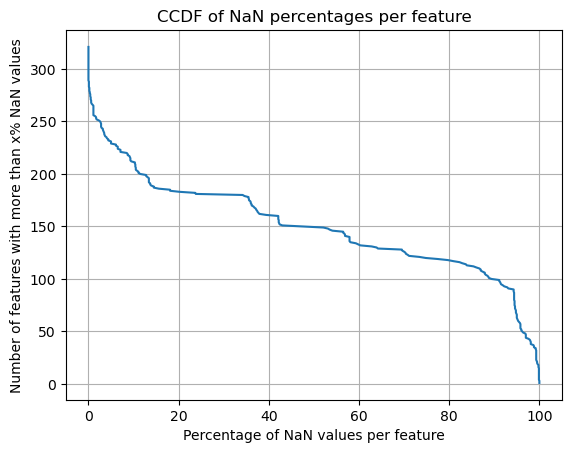

In [8]:
# Percentage of NaN values per feature
nan_percentage = np.mean(np.isnan(x_train), axis=0) * 100
# Cummulative distribution function of NaN percentages
sorted_nan_percentage = np.sort(nan_percentage)
plt.plot(sorted_nan_percentage, np.arange(len(sorted_nan_percentage), 0, -1))
plt.xlabel('Percentage of NaN values per feature')
plt.ylabel('Number of features with more than x% NaN values')
plt.title('CCDF of NaN percentages per feature')
plt.grid()
plt.show()

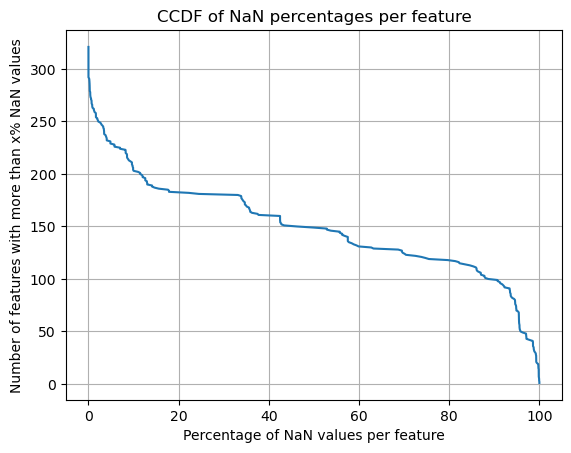

In [9]:
# Pandas version
# Plot ccdf of NaN percentages
nan_percentage = df_x_train.isna().mean() * 100
sorted_nan_percentage = np.sort(nan_percentage)
plt.plot(sorted_nan_percentage, np.arange(len(sorted_nan_percentage), 0, -1))
plt.xlabel('Percentage of NaN values per feature')
plt.ylabel('Number of features with more than x% NaN values')
plt.title('CCDF of NaN percentages per feature')
plt.grid()
plt.show()


## Replace missing values by the mean of the feature

In [19]:
mean_imputation(x_train_drop_nan, x_test_drop_nan)


In [11]:
df_x_train.fillna(df_x_train.mean(), inplace=True)
df_x_test.fillna(df_x_train.mean(), inplace=True)

## One-hot encoding 

## Handling Outliers

## Normalization

## Correlation between features

c:\Users\ACER\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ACER\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


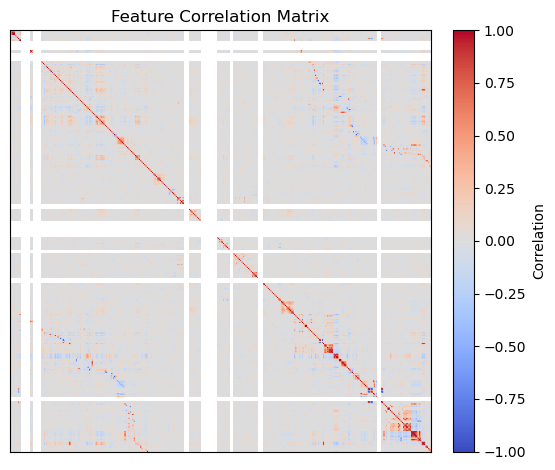

In [12]:
# Compute correlation matrix (each row is an observation, each column a feature)
corr = np.corrcoef(x_train, rowvar=False)

# Plot heatmap
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04, label="Correlation")
plt.xticks([])
plt.yticks([])
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

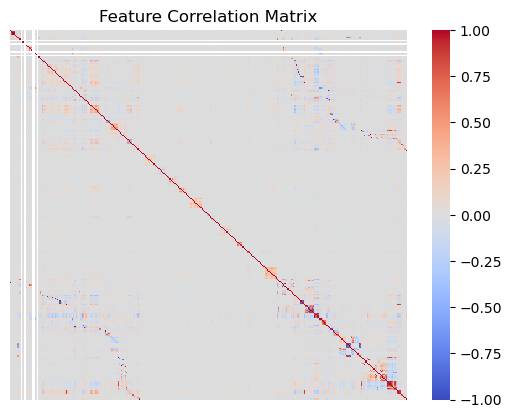

In [13]:
# Pandas version
# Compute correlation matrix (rows=features)
corr_pd = df_x_train.corr()
# Plot heatmap without axis ticks
sns.heatmap(corr_pd, cmap="coolwarm", vmin=-1, vmax=1, xticklabels=False, yticklabels=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [14]:
# Optionally print highly correlated pairs
threshold = 0.9
print(f"\nHighly correlated features (|corr| > {threshold}):")
for i in range(corr.shape[0]):
    for j in range(i + 1, corr.shape[1]):
        if abs(corr[i, j]) > threshold:
            print(f"  {feature_names[i]} ↔ {feature_names[j]} : {corr[i, j]:.2f}")


Highly correlated features (|corr| > 0.9):
  _STATE ↔ _STSTR : 1.00
  IDATE ↔ IMONTH : 1.00
  SEQNO ↔ _PSU : 1.00
  HLTHPLN1 ↔ _HCVU651 : 0.95
  BPHIGH4 ↔ _RFHYPE5 : -0.99
  BLOODCHO ↔ _CHOLCHK : 0.96
  TOLDHI2 ↔ _RFCHOL : -1.00
  ASTHMA3 ↔ _LTASTH1 : -1.00
  ASTHMA3 ↔ _ASTHMS1 : 0.94
  HAVARTH3 ↔ _DRDXAR1 : 1.00
  EDUCA ↔ _EDUCAG : 0.99
  INCOME2 ↔ _INCOMG : 0.98
  WEIGHT2 ↔ WTKG3 : 1.00
  ALCDAY5 ↔ DRNKANY5 : 1.00
  DRNK3GE5 ↔ _RFBING5 : -0.91
  EXERANY2 ↔ _TOTINDA : 1.00
  EXERHMM1 ↔ PADUR1_ : 1.00
  EXERHMM2 ↔ PADUR2_ : 1.00
  HIVTST6 ↔ _AIDTST3 : 1.00
  _STRWT ↔ _WT2RAKE : 0.96
  _CRACE1 ↔ _CPRACE : 1.00
  _LTASTH1 ↔ _ASTHMS1 : -0.94
  _CASTHM1 ↔ _ASTHMS1 : -0.94
  _RACE ↔ _RACEGR3 : 0.99
  _AGEG5YR ↔ _AGE80 : 0.99
  _AGEG5YR ↔ _AGE_G : 0.97
  _AGE80 ↔ _AGE_G : 0.97
  HTIN4 ↔ HTM4 : 0.99
  _MISFRTN ↔ _MISVEGN : 0.90
  _MISFRTN ↔ _FRTRESP : -0.97
  _MISFRTN ↔ _FRUITEX : 0.97
  _MISVEGN ↔ _VEGRESP : -0.92
  _MISVEGN ↔ _VEGETEX : 0.92
  _FRTRESP ↔ _FRUITEX : -1.00
  _VEGRESP ↔ _VEGE

## Correlation between features and target

In [15]:
corr_with_target = np.array([np.corrcoef(x_train[:, i], y_train)[0, 1] for i in range(x_train.shape[1])])
correlation_ranked = np.argsort(np.abs(corr_with_target))[::-1]

excluded_features = []

for idx in correlation_ranked:
    if not np.isnan(corr_with_target[idx]):
        print(f"{feature_names[idx]}: {corr_with_target[idx]:.4f}")
    else:
        excluded_features.append(feature_names[idx])
print("\nExcluded features due to NaN correlation with target:", excluded_features)

_RFHLTH: 0.2798
GENHLTH: 0.2779
DIABETE3: -0.2469
_AGE80: 0.2364
_AGEG5YR: 0.2345
_AGE65YR: 0.2319
EMPLOY1: 0.2284
_LMTACT1: -0.2208
_DRDXAR1: -0.2202
HAVARTH3: -0.2202
_RFHYPE5: 0.2179
BPHIGH4: -0.2161
INTERNET: 0.2158
_AGE_G: 0.2108
_LMTSCL1: -0.2082
_LMTWRK1: -0.2007
TOLDHI2: -0.1836
_RFCHOL: 0.1836
CPDEMO1: 0.1747
PNEUVAC3: -0.1727
QLACTLM2: -0.1688
PAVIG21_: 0.1456
DIFFWALK: -0.1423
CHCCOPD1: -0.1415
PHYSHLTH: -0.1395
MISTMNT: -0.1382
VETERAN3: -0.1379
USEEQUIP: -0.1362
_EDUCAG: -0.1339
CHCSCNCR: -0.1324
DIFFALON: -0.1306
CVDSTRK3: -0.1291
EDUCA: -0.1279
DIFFDRES: -0.1278
_CHOLCHK: -0.1252
BPMEDS: -0.1231
ADDEPEV2: -0.1220
INCOME2: -0.1217
DIABEDU: 0.1210
ADTHINK: -0.1209
_INCOMG: -0.1199
ADMOVE: -0.1173
ACTIN11_: 0.1151
SMOKE100: -0.1148
ADFAIL: -0.1148
PA1VIGM_: 0.1143
CIMEMLOS: -0.1142
CHCOCNCR: -0.1142
DECIDE: -0.1139
DIABEYE: -0.1103
BLOODCHO: -0.1099
BLIND: -0.1092
FRUITJU1: -0.1074
DRNKANY5: 0.1063
EXERANY2: 0.1059
_TOTINDA: 0.1059
ALCDAY5: 0.1033
CHOLCHK: -0.1024
SMOKDAY2:

c:\Users\ACER\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ACER\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [16]:
# Pandas version
corr_with_target_pd = df_x_train.apply(lambda col: col.corr(df_y_train['_MICHD']))
correlation_ranked_pd = corr_with_target_pd.abs().sort_values(ascending=False)

excluded_features = []

for feature, corr_value in correlation_ranked_pd.items():
    if np.isnan(corr_value):
        excluded_features.append(feature)
    else:
        print(f"{feature}: {corr_value:.4f}")
        
print("\nExcluded features due to NaN correlation with target:", excluded_features)
    

GENHLTH: 0.2488
_RFHLTH: 0.2348
_AGEG5YR: 0.2258
_AGE80: 0.2245
_RFHYPE5: 0.2172
BPHIGH4: 0.2143
DIFFWALK: 0.2128
EMPLOY1: 0.2111
_AGE_G: 0.2069
CVDSTRK3: 0.2060
_AGE65YR: 0.2028
USEEQUIP: 0.1906
CHCCOPD1: 0.1858
QLACTLM2: 0.1846
_LMTSCL1: 0.1810
_LMTACT1: 0.1754
_RFCHOL: 0.1750
TOLDHI2: 0.1750
PNEUVAC3: 0.1707
HAVARTH3: 0.1678
_DRDXAR1: 0.1678
DIABETE3: 0.1674
_LMTWRK1: 0.1636
INTERNET: 0.1477
DIFFALON: 0.1379
CHCKIDNY: 0.1340
VETERAN3: 0.1197
DIFFDRES: 0.1162
CHILDREN: 0.1156
INCOME2: 0.1091
_INCOMG: 0.1084
SMOKE100: 0.1070
_CHLDCNT: 0.1046
BLIND: 0.1035
PHYSHLTH: 0.1010
DECIDE: 0.0976
CHOLCHK: 0.0972
_CHOLCHK: 0.0935
DRNKANY5: 0.0871
ALCDAY5: 0.0867
EDUCA: 0.0859
BPMEDS: 0.0858
BLOODCHO: 0.0855
_EDUCAG: 0.0847
CHCOCNCR: 0.0846
CHCSCNCR: 0.0840
ACTIN11_: 0.0827
ARTHSOCL: 0.0822
JOINPAIN: 0.0795
QSTVER: 0.0792
EXERANY2: 0.0779
_TOTINDA: 0.0779
SEX: 0.0709
DRADVISE: 0.0702
FLUSHOT6: 0.0697
ADDEPEV2: 0.0686
CIMEMLOS: 0.0678
_SMOKER3: 0.0677
CHECKUP1: 0.0664
_PA150R2: 0.0656
LMTJOIN3: 0.

## Final Sanity Check

In [ ]:
print("Final shape:", x_train.shape)
print("Any NaNs left?", np.isnan(x_train).any())
print("Feature means (first 5):", np.nanmean(x_train, axis=0)[:5])
print("Feature stds (first 5):", np.nanstd(x_train, axis=0)[:5])


## Principal Component Analysis (PCA) (Optional)

Keeping 1 components explaining nan% variance


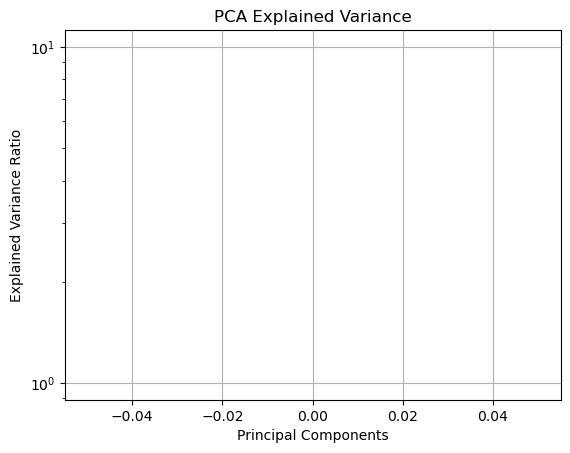

In [17]:
x_train_pca, eigvecs, explained_variance = pca_reduce(x_train, variance_threshold=1-1e-6)

plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance)
plt.yscale('log')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

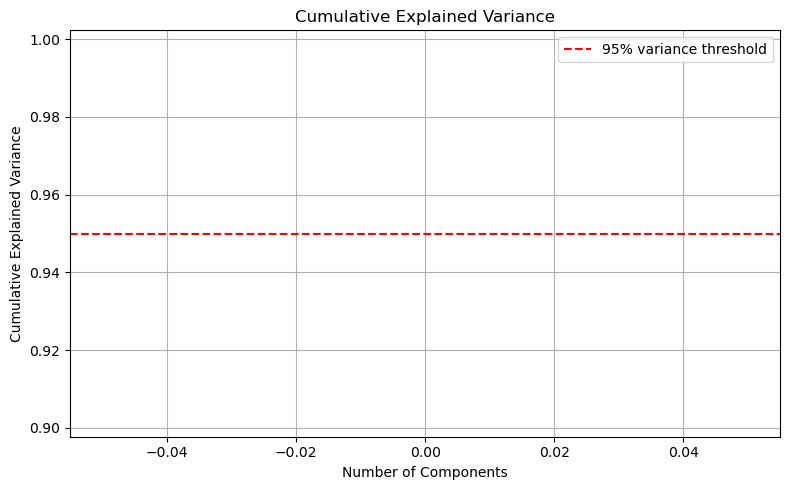

In [18]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


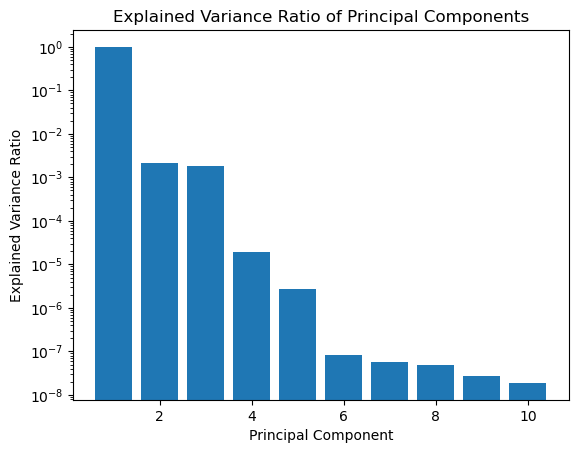

In [19]:
# using pandas and sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_reduce = pca.fit_transform(df_x_train.fillna(df_x_train.mean()))

# Plot the explained variance ratio, y log scale
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.yscale('log')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Logistic Regression

Still in progress...

In [20]:
y_train_bin = (y_train == 1).astype(int)

# add constant bias feature (column of ones)
const_train = np.ones((x_train.shape[0], 1))
const_test = np.ones((x_test.shape[0], 1))
x_train = np.hstack((x_train, const_train))
x_test = np.hstack((x_test, const_test))

max_iters = 1000      # number of gradient descent steps
gamma = 0.0001       # learning rate

initial_w = np.zeros(x_train.shape[1])
w, loss = logistic_regression(y_train, x_train, initial_w, max_iters, gamma)
print(f"Final training loss: {loss:.4f}")

Final training loss: nan


In [21]:
def predict_labels(tx, w, threshold=0.5):
    pred = sigmoid(tx @ w)
    return (pred >= threshold).astype(int)

In [22]:
y_pred_train = predict_labels(x_train, w)

def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

acc_train = compute_accuracy(y_train_bin, y_pred_train)

print(f"Training accuracy: {acc_train*100:.2f}%")


Training accuracy: 90.80%


In [23]:
# Predict on test set and save predictions
y_pred_test = 2*predict_labels(x_test, w) - 1
create_csv_submission(test_ids, y_pred_test, 'logistic_regression_submission.csv')

In [24]:
# Logistic regression with sklearn
from sklearn.linear_model import LogisticRegression

# add constant bias feature (column of ones)
df_x_train['_CONST'] = 1
df_x_test['_CONST'] = 1

model = LogisticRegression(max_iter=1000)
model.fit(df_x_train, df_y_train.values.ravel())

# percentage of correct predictions
y_pred_train = model.predict(df_x_train)
accuracy = np.mean(y_pred_train == df_y_train.values.ravel())
print(f"Training accuracy: {accuracy*100:.2f}%")

Training accuracy: 91.17%


In [ ]:
# Neural Network with sklearn
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=1000)
model.fit(df_x_train, df_y_train.values.ravel())

# Performance on training set
y_pred_train = model.predict(df_x_train)
accuracy = np.mean(y_pred_train == df_y_train.values.ravel())
print(f"Training accuracy: {accuracy*100:.2f}%")

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
# SVM with kernel
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(df_x_train, df_y_train.values.ravel())
# Performance on training set
y_pred_train = model.predict(df_x_train)
accuracy = np.mean(y_pred_train == df_y_train.values.ravel())
print(f"Training accuracy: {accuracy*100:.2f}%")

In [ ]:
# predict on test set
y_pred_test = model.predict(df_x_test)
create_csv_submission(test_ids, y_pred_test, 'logistic_regression_sklearn_submission.csv')